# 《python数据可视化之matplotlib实践》
## chapter 4
## 完善统计图形


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

mpl.rcParams['font.sans-serif'] = ['FangSong']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False # 不使用unicode_minus模式处理坐标轴轴线为负数的情况，


## 显示图例和标题
## legend 和 title

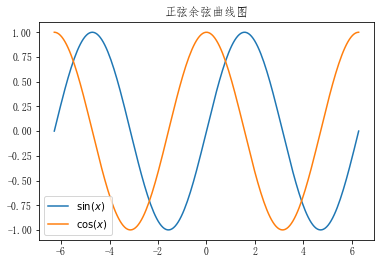

In [3]:
# 图例和标题
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y_1 = np.sin(x)
y_2 = np.cos(x)

'''
matplotlib 支持Tex公式输入，格式为：`r$formula$`
r表示该字符串为raw strings，字符串按照Tex规范解析。

对于两个美元符号之间的非数学公式字符串会按照泄题的形式输出，呈现印刷级别的文档效果
'''
plt.plot(x,y_1, label=r'$\sin(x)$')
plt.plot(x,y_2,label=r'$\cos(x)$')
plt.legend(loc='lower left')
plt.title('正弦余弦曲线图')
plt.show()

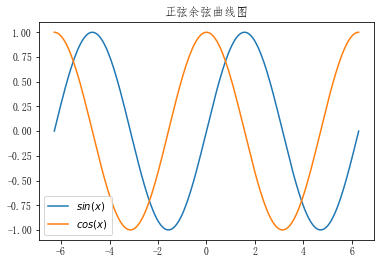

In [5]:
plt.plot(x,y_1, label='$sin(x)$') # 没有按照Tex格式，中间的sin识别为普通字符串（没有写成\sin）
plt.plot(x,y_2,label='$cos(x)$')
plt.legend(loc='lower left')
plt.title('正弦余弦曲线图')
plt.show()

## 图例样式的调整

bbox_to_anchor : `.BboxBase` or pair of floats
    Specify any arbitrary location for the legend in `bbox_transform`
    coordinates (default Axes coordinates).

    For example, to put the legend's upper right hand corner in the
    center of the axes the following keywords can be used::

       loc='upper right', bbox_to_anchor=(0.5, 0.5) 将图例的右上角放在中心

loc : int or string or pair of floats, default: 'upper right'
    The location of the legend. Possible codes are:

        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============



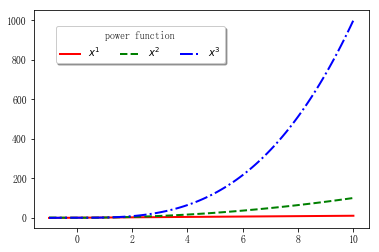

In [11]:

x = np.linspace(-1,10,100)
y_1 = np.power(x, 1)
y_2 = np.power(x, 2)
y_3 = np.power(x, 3)

plt.plot(x, y_1, ls='-', lw=2, color='r',label=r"$x^{1}$")
plt.plot(x, y_2, ls='--', lw=2, color='g',label=r"$x^{2}$")
plt.plot(x, y_3, ls='-.', lw=2, color='b',label=r"$x^{3}$")

plt.legend(loc='upper left', 
	bbox_to_anchor=(0.05,0.95),  # 将图例的左上角放在整幅图的（0.05， 0.95）处
	ncol=3, #图例分成3列
	title='power function',  # 图例的标题
	shadow=True,
	fancybox=True)# 控制图例圆角或方角
plt.show()


## 标题的样式

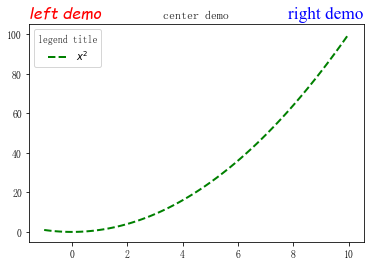

In [17]:
## 标题的样式
plt.plot(x, y_2, ls='--', lw=2, color='g',label=r"$x^{2}$")
plt.legend(title='legend title')
plt.title('center demo')
plt.title('left demo', loc='left', fontdict={'fontsize':16, 'color':'r','family':'Comic Sans MS','style':'oblique'})
plt.title('right demo',loc='right', fontdict={'size':'xx-large', 'color':'b','family':'Times New Roman'})
plt.show()

Text(0,1,'left demo')

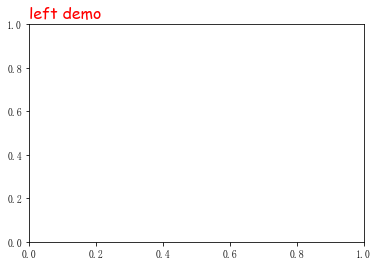

In [14]:
plt.title('left demo', loc='left', fontdict={'fontsize':16, 'color':'r','family':'Comic Sans MS'}) # 可以写成字典形式


Text(0,1,'left demo')

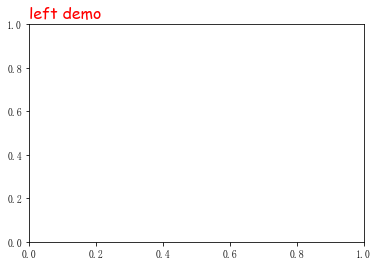

In [16]:
plt.title('left demo', loc='left', fontsize=16, color='r',family='Comic Sans MS') # 也可以直接指定

## 案例3 带图例的饼图
## pie 分裂式饼图

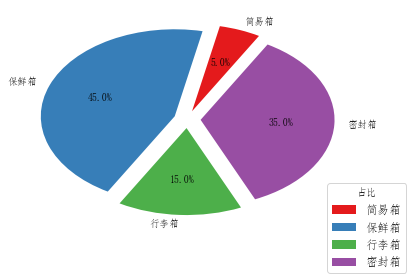

In [21]:
## 案例3 带图例的饼图
## pie 分裂式饼图
elements = ['简易箱','保鲜箱', '行李箱', '密封箱']
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
sold_nums = [0.05, 0.45, 0.15, 0.35]
explode = (0.1,0.1,0.1,0.1)
wedges, texts, autotexts = plt.pie(x=sold_nums, 
									labels=elements,
									autopct="%3.1f%%",  # 饼图内部显示的数字格式
									startangle=60,  # 偏离角度
									colors=colors,
									explode=explode)  # 设置偏离半径的百分比

plt.legend(wedges, elements, fontsize=12, title='占比', loc='center left', bbox_to_anchor=(0.9,0,0,0))

# Set a property on an artist object.
plt.show()



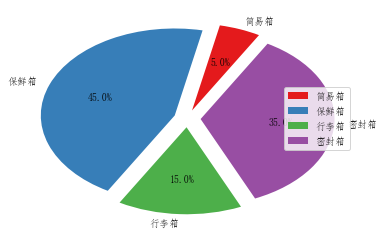

In [24]:
wedges, texts, autotexts = plt.pie(x=sold_nums, 
									labels=elements,
									autopct="%3.1f%%",  # 饼图内部显示的数字格式
									startangle=60,  # 偏离角度
									colors=colors,
									explode=explode)  # 设置偏离半径的百分比
plt.legend(loc='center right')

plt.show()

## setp 设置属性

Set a property on an artist object.

matplotlib supports the use of setp ("set property") and getp to set and get object properties, as well as to do introspection on the object. For example, to set the linestyle of a line to be dashed, you can do:

```
>>> line, = plot([1,2,3])
>>> setp(line, linestyle='--')
```

If you want to know the valid types of arguments, you can provide the name of the property you want to set without a value:
```
>>> setp(line, 'linestyle')
    linestyle: [ '-' | '--' | '-.' | ':' | 'steps' | 'None' ]
```

If you want to see all the properties that can be set, and their possible values, you can do:
```
>>> setp(line)
    ... long output listing omitted
```

setp operates on a single instance or a list of instances. If you are in query mode introspecting the possible values, only the first instance in the sequence is used. When actually setting values, all the instances will be set. e.g., suppose you have a list of two lines, the following will make both lines thicker and red:
```
>>> x = arange(0,1.0,0.01)
>>> y1 = sin(2*pi*x)
>>> y2 = sin(4*pi*x)
>>> lines = plot(x, y1, x, y2)
>>> setp(lines, linewidth=2, color='r')
```

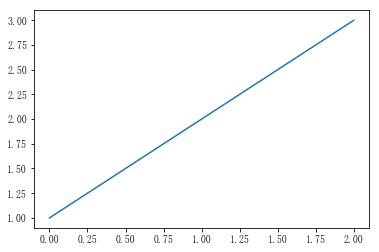

In [28]:
line = plt.plot([1,2,3])

In [29]:
plt.setp(line)  # 显示所有可以设置的属性

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  antialiased or aa: bool 
  clip_box: a `.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a `.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: object 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  linewidth or lw: float value in points 
  marker: :mod:`A valid 

In [35]:
# 显示某属性所有的可能
plt.setp(line, 'linestyle')

  linestyle: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]


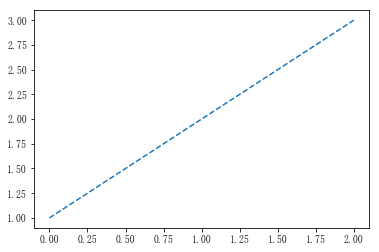

In [33]:
line = plt.plot([1,2,3])
plt.setp(line, linestyle='--')
plt.show()

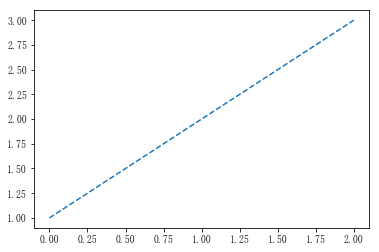

In [34]:
# 等同于
plt.plot([1,2,3], linestyle='--')
plt.show()

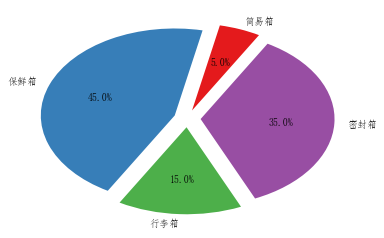

In [36]:
wedges, texts, autotexts = plt.pie(x=sold_nums, 
									labels=elements,
									autopct="%3.1f%%",  # 饼图内部显示的数字格式
									startangle=60,  # 偏离角度
									colors=colors,
									explode=explode)  # 设置偏离半径的百分比


In [37]:
plt.setp(wedges)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float or None 
  animated: bool 
  antialiased or aa: bool or None 
  capstyle: ['butt' | 'round' | 'projecting'] 
  center: unknown
  clip_box: a `.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color: matplotlib color spec
  contains: a callable function 
  edgecolor or ec: mpl color spec, None, 'none', or 'auto' 
  facecolor or fc: mpl color spec, or None for default, or 'none' for no color 
  figure: a `.Figure` instance 
  fill: bool 
  gid: an id string 
  hatch: ['/' | '\\' | '|' | '-' | '+' | 'x' | 'o' | 'O' | '.' | '*'] 
  joinstyle: ['miter' | 'round' | 'bevel'] 
  label: object 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  linewidth or lw: float or None for default 
  path

In [39]:
plt.setp(texts)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: bool 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a `.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: object 
  linespacing: float (multiple of font size) 
  multialignment or ma: ['left' | 'right' | 'center' ] 
  path_

In [40]:
plt.setp(autotexts)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: bool 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a `.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: object 
  linespacing: float (multiple of font size) 
  multialignment or ma: ['left' | 'right' | 'center' ] 
  path_

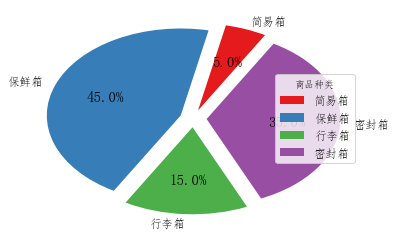

In [44]:
wedges, texts, autotexts = plt.pie(x=sold_nums, 
									labels=elements,
									autopct="%3.1f%%",  # 饼图内部显示的数字格式
									startangle=60,  # 偏离角度
									colors=colors,
									explode=explode)  # 设置偏离半径的百分比

plt.legend(wedges, elements, title='商品种类', loc='center right', fontsize=12)
plt.setp(autotexts,size=15,weight='bold')
plt.setp(texts, size=12)
# Set a property on an artist object.
plt.show()

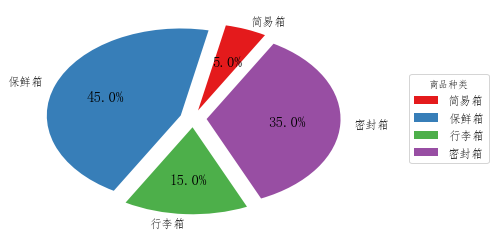

In [51]:
wedges, texts, autotexts = plt.pie(x=sold_nums, 
									labels=elements,
									autopct="%3.1f%%",  # 饼图内部显示的数字格式
									startangle=60,  # 偏离角度
									colors=colors,
									explode=explode)  # 设置偏离半径的百分比

plt.legend(wedges, elements, title='商品种类', loc='center right', fontsize=12, 
           bbox_to_anchor=(0.9, 0.5, 0.5, 0)) # 指定图例摆放位置
plt.setp(autotexts,size=15,weight='bold')
plt.setp(texts, size=12)
# Set a property on an artist object.
plt.show()

## 设置刻度范围和刻度标签


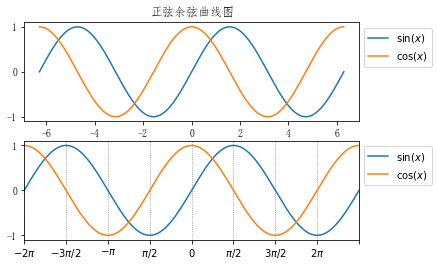

In [65]:
## 设置刻度范围和刻度标签

x = np.linspace(-2*np.pi, 2*np.pi, 200)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.subplot(211) # 2行1列，指定第一个子图
plt.title('正弦余弦曲线图')
plt.plot(x,y_1, label=r'$\sin(x)$')
plt.plot(x,y_2,label=r'$\cos(x)$')
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5,0.9,0.9))

plt.subplot(212) # 2行1列，指定第二个子图
# 1. 刻度以圆周率形式展示
# 2. 设置合理的范围
plt.xlim(-2*np.pi, 2*np.pi)
plt.xticks([-2*np.pi, -1.5 *np.pi, -np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],
		[r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$',r'$\pi/2$',r'$0$',r'$\pi/2$',r'$3\pi/2$',r'$2\pi$'])

plt.plot(x,y_1, label=r'$\sin(x)$')
plt.plot(x,y_2,label=r'$\cos(x)$')
plt.grid(axis='x',color='gray',ls=":")
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5,0.9,0.9))
plt.show()


## 设置逆序坐标轴刻度


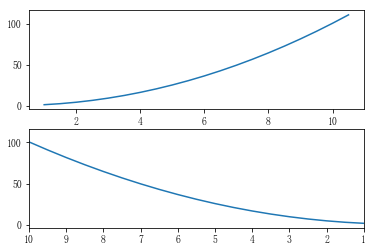

In [69]:

## 设置逆序坐标轴刻度
x = np.arange(1,11,0.5)
y = np.power(x, 2) + 0.7
plt.subplot(211)
plt.plot(x,y)

plt.subplot(212)
plt.plot(x,y)
plt.xlim(10 ,1)  # 逆序显示坐标轴刻度
plt.show()

## 饼图下面添加表格

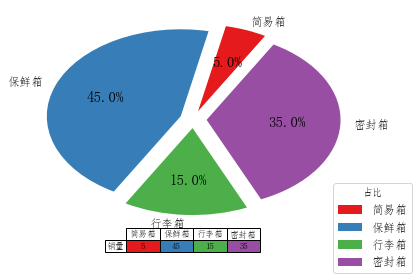

In [82]:

## 饼图下面添加表格
# 饼图
elements = ['简易箱','保鲜箱', '行李箱', '密封箱']
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
sold_nums = [0.05, 0.45, 0.15, 0.35]
explode = (0.1,0.1,0.1,0.1)
wedges, texts, autotexts = plt.pie(x=sold_nums, 
									labels=elements,
									autopct="%3.1f%%",  # 饼图内部显示的数字格式
									startangle=60,  # 偏离角度
									colors=colors,
									explode=explode)  # 设置偏离半径的百分比

plt.legend(wedges, elements, fontsize=12, title='占比', loc='center left', bbox_to_anchor=(0.9,0,0,0))
plt.setp(autotexts,size=15,weight='bold')
plt.setp(texts, size=12)
# Set a property on an artist object.

# 添加表格
col_labels = elements
row_labels = ['销量']
values = [[5,45,15,35]] 
plt.table(cellText=values, # 二维列表的形式，至少一行
	cellColours=[colors], # 二维列表的形式，至少一行
	colWidths=[0.1]*4, # 每列的宽度
	colLabels=col_labels, # 每列的标签
	rowLabels=row_labels, # 每行的标签
	loc='bottom', # 表格整体的位置
	rowLoc='center', # 每行元素的样式
	cellLoc='center')
plt.show()


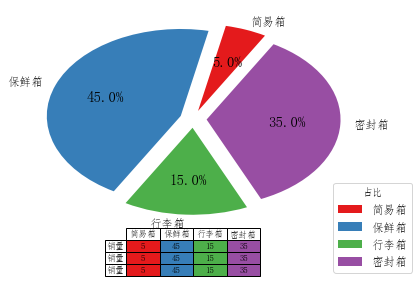

In [84]:
## 饼图下面添加表格
# 饼图
elements = ['简易箱','保鲜箱', '行李箱', '密封箱']
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
sold_nums = [0.05, 0.45, 0.15, 0.35]
explode = (0.1,0.1,0.1,0.1)
wedges, texts, autotexts = plt.pie(x=sold_nums, 
									labels=elements,
									autopct="%3.1f%%",  # 饼图内部显示的数字格式
									startangle=60,  # 偏离角度
									colors=colors,
									explode=explode)  # 设置偏离半径的百分比

plt.legend(wedges, elements, fontsize=12, title='占比', loc='center left', bbox_to_anchor=(0.9,0,0,0))
plt.setp(autotexts,size=15,weight='bold')
plt.setp(texts, size=12)
# Set a property on an artist object.

# 添加表格
col_labels = elements
row_labels = ['销量']
values = [[5,45,15,35],[5,45,15,35],[5,45,15,35]]  # 三行
plt.table(cellText=values, # 二维列表的形式，至少一行
	cellColours=[colors]*3, # 二维列表的形式，至少一行
	colWidths=[0.1]*4, # 每列的宽度
	colLabels=col_labels, # 每列的标签
	rowLabels=row_labels*3, # 每行的标签
	loc='bottom', # 表格整体的位置
	rowLoc='center', # 每行元素的样式
	cellLoc='center')
plt.show()


In [75]:
col_labels

[['简易箱', '保鲜箱', '行李箱', '密封箱']]